### Parte 2: Diseño del Waveform Former - n-Tuple Former 

$$
\begin{aligned}
&\text{La segunda etapa consiste en generar la forma de onda a transmitir a partir del numero decimal entero } s(nT_s), \\
&\text{esta onda se denomina chirp, donde el termino S(nTs) indica la frecuencia inicial a partir de la cual dicha señal} \\
&\text{comienza a transmitir los símbolos codificados.}
\end{aligned}
$$

$$
\begin{aligned}
&\textbf{Forma de onda modulada por FSCM:} \\[1em]
&\hspace{5cm} c(nT_s + kT) = \frac{1}{\sqrt{2^{SF}}} \cdot e^{j2\pi[(s(nT_s)+k) \bmod 2^{SF}]\frac{kT}{B}} \quad (2) \\[1em]
&\text{Si reformulamos la ecuación 2,  usando la relación: } T = \frac{1}{B} \\
&\text{\hspace{0.5cm} Sabemos que: } T = \frac{1}{B} \Longrightarrow \quad T \cdot B = 1  \\
&\text{\hspace{0.5cm} Entonces: } kT \cdot B = k \\
&\text{\hspace{0.5cm} Sustituyendo en la ecuación } (2): \text{damos origen a la ecuación } (3)  \\
&\hspace{5cm} c(nT_s + kT) = \frac{1}{\sqrt{2^{SF}}} \cdot e^{j2\pi[(s(nT_s)+k) \bmod 2^{SF}] \cdot \frac{k}{2^{SF}}} (3) \\[1em]


&\text{donde:} \\
&\hspace{1cm} c(nT_s + kT) \text{ es la señal chirp modulada en el tiempo } nT_s + kT \\
&\hspace{1cm} \frac{1}{\sqrt{2^{SF}}} \text{ es el factor de normalización de energía (asegura energía unitaria para cada símbolo)} \\
&\hspace{1cm} s(nT_s) \text{ es el símbolo codificado (de la Ecuación 1)} \\
&\hspace{1cm} k \text{ es el índice de muestra dentro del símbolo } (k = 0, 1, ..., 2^{SF}-1) \\
&\hspace{1cm} T \text{ es el período de muestreo} \\
&\hspace{1cm} B \text{ es el ancho de banda del canal} \\
&\hspace{1cm} \bmod 2^{SF} \text{ indica la operación módulo } 2^{SF} \\[2em]

&\text{La ecuación } (2)\quad y\quad (3) \text{ del paper define la forma de onda transmitida por el modulador FSCM, donde cada} \\
&\text{ símbolo} s(nT_s) \in {0,1,...,2^SF} \text{codifica SF bits binarios} \\

&\textbf{Características principales:} \\[1em]
&\text{1. Chirp complejo: La señal tiene frecuencia linealmente creciente dentro de cada símbolo} \\
&\text{2. Frecuencia instantánea: Depende de } (s(nT_s)+k) \bmod 2^{SF}, \text{ que representa un corrimiento de frecuencia} \\
&\text{\hspace{0.5cm} específico para cada símbolo y hace que la frecuencia aumente de manera lineal en el tiempo } \\
&\text{3. Ortogonalidad: Los diferentes símbolos generan chirps ortogonales entre sí, facilitando la decodificación} \\
&\text{4. Normalización: El factor } \frac{1}{\sqrt{2^{SF}}} \text{ mantiene la energía constante por símbolo} \\ 
&\text{\hspace{0.5cm}es el proceso mediante el cual una señal se escala para que su energía total sea igual a 1 } \\
&\text{\hspace{0.5cm} Esto permite: comparar distintas señales de forma justa, controlaar la energía o potencia  } \\
&\text{\hspace{0.5cm} promedio transmitida y aplicar citerios óptimos  } (como detección ML) \text{ sin sesgos por amplitud} \\
&\text{a. Esto asegura que todos los símbolos tengan energía unitaria, lo que es necesario para el análisis óptimo en  }  \\
&\text{\hspace{0.5cm} presencia de ruido blanco  } (AWGN) \\
&\textbf{Ventajas:} \\[1em]
&\text{1. Robustez en canales selectivos: propiedad de una modulación que permite mantener baja tasa de error en } \\
&\text{\hspace{0.5cm} presencia de canales con respuesta en frecuencia no plana, es decir, donde ciertas subbandas del } \\
&\text{\hspace{0.5cm} espectro sufren atenuación significativa. } \\
&\text{2. Demodulación eficiente: implementación del proceso de detección óptima con complejidad computacional reducida, } \\
&\text{\hspace{0.5cm} frecuentemente lograda mediante rápidas (FFT), evitando correlaciones directas sobre una base completa de señales } \\

&\textbf{Resumen:} \\[1em]
&\text{Modela cada símbolo como un chirp complejo que varía su frecuencia en el tiempo con una pendiente fija, pero que} \\
&\text{\hspace{0.5cm} comienza en una frecuencia inicial diferente para cada símbolo. Esto hace que los símbolos sean  } \\
&\text{\hspace{0.5cm} ortogonales, tengan la misma energía y puedan demodularse de forma eficiente usando una FFT} \\
\end{aligned}
$$

$$
\begin{aligned}
&\text{Luego de definir la forma de onda transmitida } c(nT_s + kT) \text{asociada a un símbolo } s(nT_s), \\
&\text{ como una secuencia chirp ortogonalizada y normalizada (Ecuación 3). Se analiza la ortogonalidad entre las} \\
&\text{las diferentes formas de onda posible para distintos símbolos:} \\
&\text{\hspace{0.5cm} Es decir, si } s_1 \neq  s_2, \text{ entonces los chirp asociados deben ser ortogonales}\\
&\text{\hspace{0.5cm} Esto se demuestra en las ecuaciones (4) a (9) del paper [1], culminando en:} \\
&\hspace{5cm} \langle c_i, c_j \rangle = 0 \quad \text{para } i \neq j\\[1em]
&\text{\hspace{0.5cm} propiedad clave para poder realizar detección óptima en presencia de ruido. } \\

\end{aligned}
$$


\begin{aligned}
&\text{En consecuencia, se plantea la ecuación que describe la señal recibida por el receptor óptimo para la} \\
&\text{modulación utilizada, proceso que culmina en la detección óptima en presencia de ruido blanco (AWGN),} \\
&\text{y en la implementación eficiente mediante el \emph{n-tuple former}.} \\
&\text{Este planteo parte de la suposición de que las señales poseen igual energía, con sincronización perfecta} \\
&\text{en tiempo y frecuencia, así como también una fuente que emite símbolos con igual probabilidad.} \\[1em]
&\hspace{5cm} r(nT_s + kT) = c(nT_s + kT) + w(nT_s + kT)  (10)\\[1em]
&\text{donde:} \\
&\hspace{1cm} c(nT_s + kT): \text{ chirp transmitida para el símbolo } s(nT_s), \\
&\hspace{1cm} w(nT_s + kT): \text{ ruido blanco gaussiano complejo de media cero y varianza constante}, \\
&\hspace{1cm} r(nT_s + kT): \text{ señal recibida en el instante discreto } k.
\end{aligned}



$$
\begin{aligned}
&\textbf{Procedimiento de detección óptima:} \\[1em]
&\text{Donde el desarrollo teórico implica el producto interno entre la señal recibida y cada base } c_q  \\
&\text{y la simplificación usando propiedades del chirp y del módulo, hasta llegar a una expresión que permite }  \\
&\text{una implementación ediciete mediante una FFT } \\
&\text{1.Producto interno entre la señal recibida }r(nT_s + kT)\text{ y cada una de las formas de onda base} c(nT_s+ kT) \\
&\text{\hspace{0.5cm} Matemáticamente: } \\
&\hspace{1cm} \langle r(nT_s + kT), c(nT_s + kT)|_{s(nT_s) = q} \rangle = \sum_{k=0}^{2^{SF}-1} r(nT_s + kT) \cdot c^*(nT_s + kT)|_{s(nT_s) = q} \quad (11) \\
&\text{\hspace{0.5cm} El valor indica cuánto se parece la señal recibida a cada una de las señales base posible.El } \\
&\text{\hspace{0.5cm} índice q que da el máximo módulo se toma como símbolo detectado  }  \\
&\text{La proyección puede simplificarse utilizando la función  } \varphi(q,k) \text{ tal como se define en las ecuaciones}\\
&\text{ (12) a (15) de [1]}  \\


\end{aligned}
$$

$$
\begin{aligned}
&\textbf{n-Tuple Former} \\[1em]
&\text{El n-Tuple Former es un procedimiento computacional eficiente que implementa la detección óptima} \\
&\text{de símbolos en la modulación Frequency Shift Chirp Modulation (FSCM). Su función es determinar} \\
&\text{cuál de los } 2^{SF} \text{ posibles símbolos fue transmitido, sin necesidad de realizar correlaciones} \\
&\text{directas con cada forma de onda base. Para ello, transforma la señal recibida mediante la} \\
&\text{multiplicación con una función conjugada (down-chirp), seguida de una Transformada Discreta} \\
&\text{de Fourier (DFT). El índice de la máxima magnitud del espectro resultante corresponde al} \\
&\text{símbolo transmitido. Este proceso reemplaza a la correlación exhaustiva y permite recuperar} \\
&\text{directamente la n-tupla binaria original asociada al símbolo, de manera eficiente.}

\end{aligned}

$$
\begin{aligned}
&\textbf{Pasos:} \\[1em]
&\text{1. Multiplicación por down chirp} \\
&\text{\hspace{0.5cm} a. Partiendo de la ecuación (10), se multiplica cada muestra de la señal recibida por un down-chirp conjugado:} \\
&\hspace{1.5cm} d(nT_s + kT) = r(nT_s + kT) \cdot e^{-j2\pi \frac{k^2}{2^{SF}}} \\
&\text{\hspace{0.5cm} elimina la componente cuadrática del chirp} \\[1em]
&\text{2. Aplicación de la DFT (vía FFT) sobre el vector } d(nT_s + kT), \text{ lo que equivale a proyectar sobre cada una} \\
&\text{\hspace{0.5cm} de las formas de onda base:} \\
&\hspace{1.5cm} \langle r, c|_p \rangle = \sum_{k=0}^{2^{SF}-1} d(nT_s + kT) \cdot e^{-j2\pi \frac{pk}{2^{SF}}} \quad (16) \\[1em]

&\text{A partir de las ecuaciones (11) a (16) del paper [1], esta proyección puede expresarse de forma expandida como:} \\[0.5em]
&\hspace{1.5cm} \sum_{k=0}^{2^{SF}-1} 
\underbrace{r(nT_s + kT) \cdot e^{-j2\pi \frac{k^2}{2^{SF}}}}_{\text{down-chirp: } d(nT_s + kT)}
\cdot \frac{1}{\sqrt{2^{SF}}} \cdot e^{-j2\pi \frac{p \cdot k}{2^{SF}}} \\[1em]


&\text{Esta expresión refleja la multiplicación por el down-chirp conjugado y posterior proyección mediante una DFT,} \\
&\text{lo que permite una detección óptima con baja complejidad computacional.}


\end{aligned}
$$



$$
\begin{aligned}
&\text{3. Decisión:} \\
&\text{\hspace{0.5cm} El índice } p \text{ que maximiza el módulo de esta proyección es el símbolo detectado.} \\
&\text{\hspace{0.5cm} Como } p \in \{0, 1, ..., 2^{SF}-1\}, \text{ puede representarse directamente como una tupla de } SF \text{ bits.}\\
\end{aligned}
$$

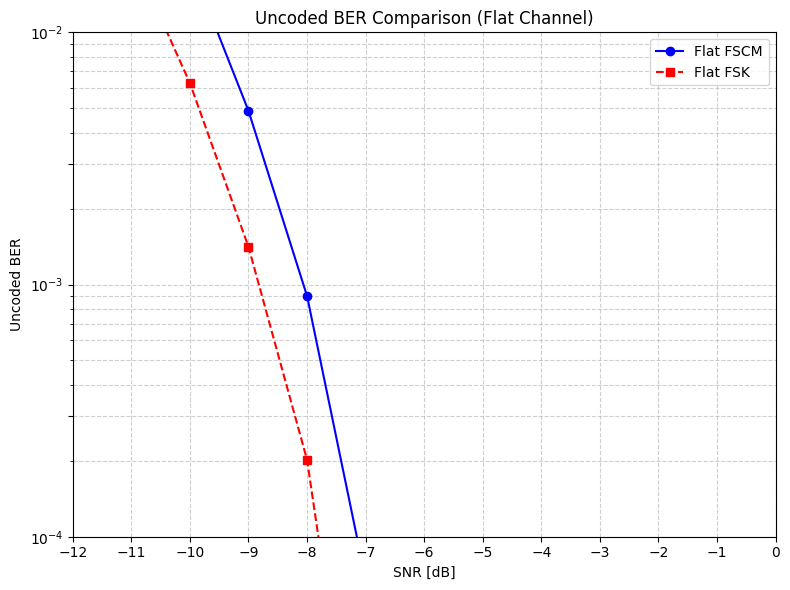

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# --- Parámetros ---
SF = 7
M = 2**SF
T = 1.0
k_vals = np.arange(M)
snr_range = np.arange(-12, 1, 1)
num_syms = 80000

# --- Modulación chirp FSCM ---
def chirp_symbol(s):
    chirp = np.exp(1j * 2 * np.pi * ((s + k_vals) % M) * k_vals / M) / np.sqrt(M)
    return chirp

def downchirp():
    return np.exp(-1j * 2 * np.pi * (k_vals**2) / M)

def fscm_detect(r):
    d = r * downchirp()
    fft_out = np.fft.fft(d)
    return np.argmax(np.abs(fft_out))

# --- Pulsos FSK ortogonales ---
def fsk_symbol(s):
    pulse = np.zeros(M)
    pulse[s] = 1.0
    return pulse

def fsk_detect(r):
    return np.argmax(r)

# --- Simulaciones BER ---
def simulate_ber(mod_fn, demod_fn, snr_dbs, num_syms, bits_per_symbol):
    ber = []
    for snr_db in snr_dbs:
        errors = 0
        for _ in range(num_syms):
            s_tx = np.random.randint(0, M)
            x = mod_fn(s_tx)
            power = np.mean(np.abs(x)**2)
            sigma2 = power / (10 ** (snr_db / 10))
            noise = np.sqrt(sigma2 / 2) * (np.random.randn(*x.shape) + 1j * np.random.randn(*x.shape))
            y = x + noise
            s_rx = demod_fn(y)
            errors += bin(s_tx ^ s_rx).count("1")
        ber.append(errors / (num_syms * bits_per_symbol))
    return np.array(ber)

# --- Ejecutar simulaciones ---
ber_fscm = simulate_ber(chirp_symbol, fscm_detect, snr_range, num_syms, SF)
ber_fsk  = simulate_ber(fsk_symbol, fsk_detect, snr_range, num_syms, SF)

# --- Configuración del gráfico tipo Fig. 1 ---
plt.figure(figsize=(8, 6))
plt.semilogy(snr_range, ber_fscm, 'o-b', label='Flat FSCM')
plt.semilogy(snr_range, ber_fsk, 's--r', label='Flat FSK')

plt.xlabel('SNR [dB]')
plt.ylabel('Uncoded BER')
plt.title('Uncoded BER Comparison (Flat Channel)')
plt.xlim(-12, 0)
plt.ylim(1e-4, 1e-2)
plt.xticks(snr_range)
plt.yticks([1e-4, 3e-4, 1e-3, 3e-3, 1e-2])
plt.grid(True, which='both', linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

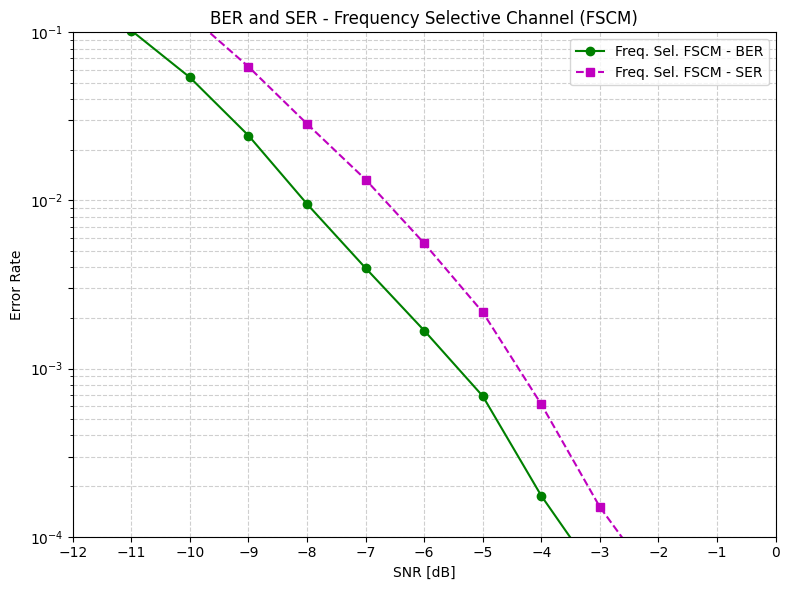

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Parámetros ---
SF = 7
M = 2**SF
T = 1.0
k_vals = np.arange(M)
snr_range = np.arange(-12, 1, 1)
num_syms = 800008

# --- Modulación chirp FSCM ---
def chirp_symbol(s):
    return np.exp(1j * 2 * np.pi * ((s + k_vals) % M) * k_vals / M) / np.sqrt(M)

def downchirp():
    return np.exp(-1j * 2 * np.pi * (k_vals**2) / M)

def fscm_detect(r):
    d = r * downchirp()
    fft_out = np.fft.fft(d)
    return np.argmax(np.abs(fft_out))

# --- Canal selectivo en frecuencia ---
h = np.zeros(2)
h[0] = np.sqrt(0.8)
h[1] = np.sqrt(0.2)

# --- Simulación BER y SER en canal selectivo ---
def simulate_ber_ser_freqsel(snr_dbs, num_syms, bits_per_symbol):
    ber_list = []
    ser_list = []
    for snr_db in snr_dbs:
        bit_errors = 0
        sym_errors = 0
        for _ in range(num_syms):
            s_tx = np.random.randint(0, M)
            x = chirp_symbol(s_tx)
            x_chan = np.convolve(x, h)[:M]  # cortar a M muestras
            power = np.mean(np.abs(x_chan)**2)
            sigma2 = power / (10 ** (snr_db / 10))
            noise = np.sqrt(sigma2 / 2) * (np.random.randn(*x.shape) + 1j * np.random.randn(*x.shape))
            y = x_chan + noise
            s_rx = fscm_detect(y)
            bit_errors += bin(s_tx ^ s_rx).count("1")
            if s_rx != s_tx:
                sym_errors += 1
        ber = bit_errors / (num_syms * bits_per_symbol)
        ser = sym_errors / num_syms
        ber_list.append(ber)
        ser_list.append(ser)
    return np.array(ber_list), np.array(ser_list)

# --- Ejecutar simulación ---
ber_freqsel, ser_freqsel = simulate_ber_ser_freqsel(snr_range, num_syms, SF)

# --- Graficar resultados ---
plt.figure(figsize=(8, 6))
plt.semilogy(snr_range, ber_freqsel, 'o-g', label='Freq. Sel. FSCM - BER')
plt.semilogy(snr_range, ser_freqsel, 's--m', label='Freq. Sel. FSCM - SER')

plt.xlabel('SNR [dB]')
plt.ylabel('Error Rate')
plt.title('BER and SER - Frequency Selective Channel (FSCM)')
plt.xlim(-12, 0)
plt.ylim(1e-4, 1e-1)
plt.xticks(snr_range)
plt.yticks([1e-4, 3e-4, 1e-3, 3e-3, 1e-2, 3e-2, 1e-1])
plt.grid(True, which='both', linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


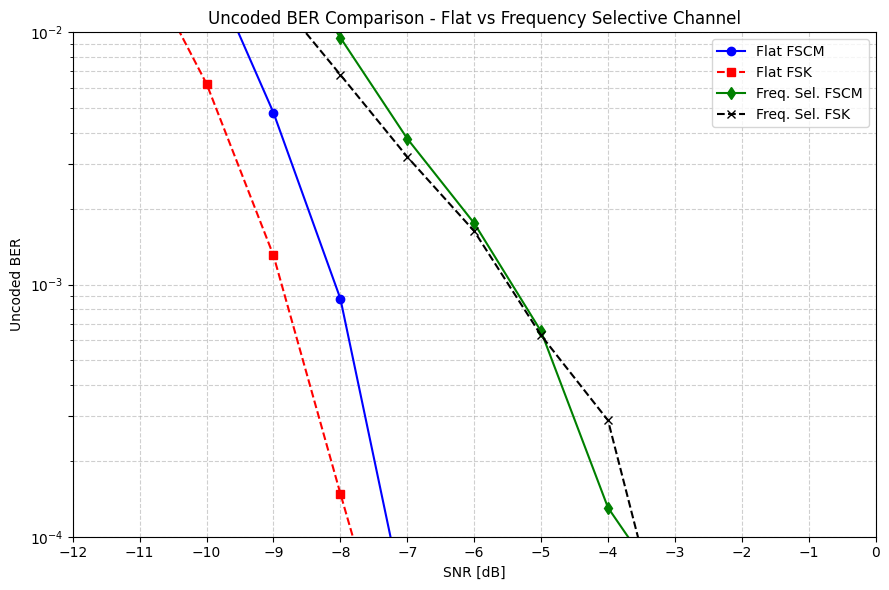

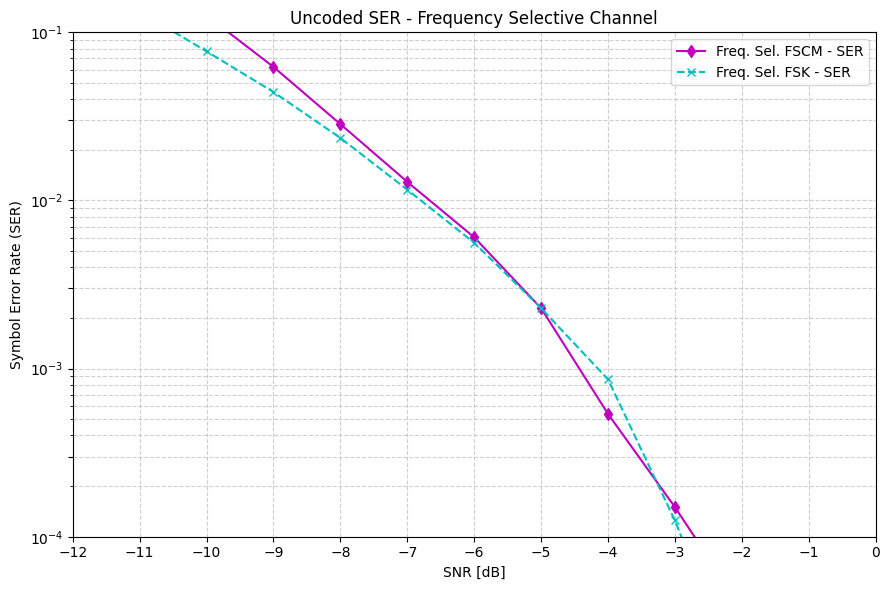

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# --- Parámetros generales ---
SF = 7
M = 2**SF
k_vals = np.arange(M)
snr_range = np.arange(-12, 1, 1)
num_syms = 80000

# --- Modulación chirp FSCM ---
def chirp_symbol(s):
    return np.exp(1j * 2 * np.pi * ((s + k_vals) % M) * k_vals / M) / np.sqrt(M)

def downchirp():
    return np.exp(-1j * 2 * np.pi * k_vals**2 / M)

def fscm_detect(r):
    d = r * downchirp()
    fft_out = np.fft.fft(d)
    return np.argmax(np.abs(fft_out))

# --- Modulación FSK ortogonal ---
def fsk_symbol(s):
    pulse = np.zeros(M)
    pulse[s] = 1.0
    return pulse

def fsk_detect(r):
    return np.argmax(r)

# --- Canal selectivo en frecuencia ---
h = np.zeros(2)
h[0] = np.sqrt(0.8)
h[1] = np.sqrt(0.2)

# --- Simulación para canal plano (BER) ---
def simulate_ber(mod_fn, demod_fn, snr_dbs, num_syms, bits_per_symbol):
    ber = []
    for snr_db in snr_dbs:
        bit_errors = 0
        for _ in range(num_syms):
            s_tx = np.random.randint(0, M)
            x = mod_fn(s_tx)
            power = np.mean(np.abs(x)**2)
            sigma2 = power / (10 ** (snr_db / 10))
            noise = np.sqrt(sigma2 / 2) * (np.random.randn(M) + 1j * np.random.randn(M))
            y = x + noise
            s_rx = demod_fn(y)
            bit_errors += bin(s_tx ^ s_rx).count("1")
        ber.append(bit_errors / (num_syms * bits_per_symbol))
    return np.array(ber)

# --- Simulación para canal selectivo (BER y SER) ---
def simulate_ber_ser_freqsel(mod_fn, demod_fn, snr_dbs, num_syms, bits_per_symbol):
    ber_list = []
    ser_list = []
    for snr_db in snr_dbs:
        bit_errors = 0
        sym_errors = 0
        for _ in range(num_syms):
            s_tx = np.random.randint(0, M)
            x = mod_fn(s_tx)
            x_chan = np.convolve(x, h)[:M]  # cortar a M muestras
            power = np.mean(np.abs(x_chan)**2)
            sigma2 = power / (10 ** (snr_db / 10))
            noise = np.sqrt(sigma2 / 2) * (np.random.randn(M) + 1j * np.random.randn(M))
            y = x_chan + noise
            s_rx = demod_fn(y)
            bit_errors += bin(s_tx ^ s_rx).count("1")
            if s_rx != s_tx:
                sym_errors += 1
        ber = bit_errors / (num_syms * bits_per_symbol)
        ser = sym_errors / num_syms
        ber_list.append(ber)
        ser_list.append(ser)
    return np.array(ber_list), np.array(ser_list)

# --- Simulaciones ---
ber_fscm_flat = simulate_ber(chirp_symbol, fscm_detect, snr_range, num_syms, SF)
ber_fsk_flat  = simulate_ber(fsk_symbol, fsk_detect, snr_range, num_syms, SF)

ber_fscm_freqsel, ser_fscm_freqsel = simulate_ber_ser_freqsel(chirp_symbol, fscm_detect, snr_range, num_syms, SF)
ber_fsk_freqsel, ser_fsk_freqsel   = simulate_ber_ser_freqsel(fsk_symbol, fsk_detect, snr_range, num_syms, SF)

# --- Gráfico 1: Comparación de BER (como Fig. 1 del paper) ---
plt.figure(figsize=(9, 6))
plt.semilogy(snr_range, ber_fscm_flat, 'o-b', label='Flat FSCM')
plt.semilogy(snr_range, ber_fsk_flat, 's--r', label='Flat FSK')
plt.semilogy(snr_range, ber_fscm_freqsel, 'd-g', label='Freq. Sel. FSCM')
plt.semilogy(snr_range, ber_fsk_freqsel, 'x--k', label='Freq. Sel. FSK')

plt.xlabel('SNR [dB]')
plt.ylabel('Uncoded BER')
plt.title('Uncoded BER Comparison - Flat vs Frequency Selective Channel')
plt.xlim(-12, 0)
plt.ylim(1e-4, 1e-2)
plt.xticks(snr_range)
plt.yticks([1e-4, 3e-4, 1e-3, 3e-3, 1e-2])
plt.grid(True, which='both', linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

# --- Gráfico 2 (opcional): Comparación de SER ---
plt.figure(figsize=(9, 6))
plt.semilogy(snr_range, ser_fscm_freqsel, 'd-m', label='Freq. Sel. FSCM - SER')
plt.semilogy(snr_range, ser_fsk_freqsel, 'x--c', label='Freq. Sel. FSK - SER')

plt.xlabel('SNR [dB]')
plt.ylabel('Symbol Error Rate (SER)')
plt.title('Uncoded SER - Frequency Selective Channel')
plt.xlim(-12, 0)
plt.ylim(1e-4, 1e-1)
plt.xticks(snr_range)
plt.yticks([1e-4, 3e-4, 1e-3, 3e-3, 1e-2, 3e-2, 1e-1])
plt.grid(True, which='both', linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


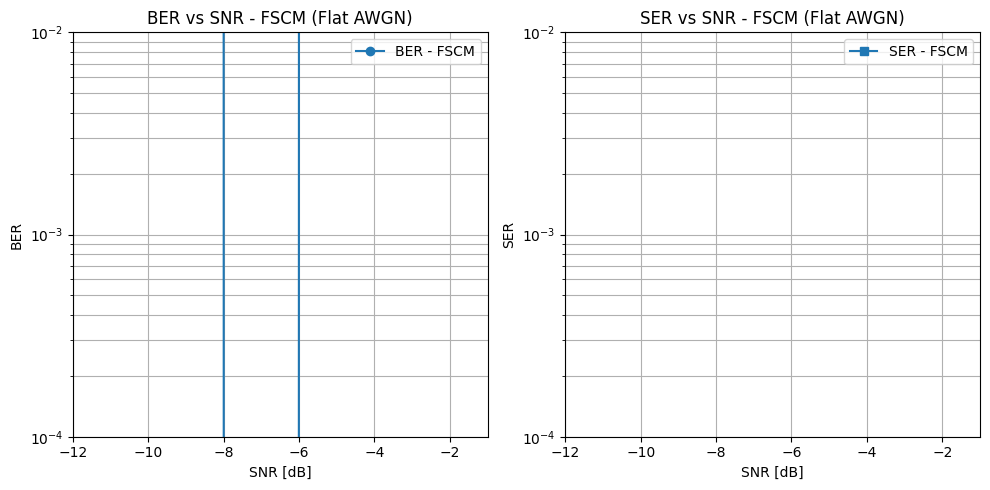

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
SF = 7
M = 2 ** SF  # número de símbolos (modulación M-aria)
Ns = M       # muestras por símbolo
Nsym = 600000  # cantidad de símbolos simulados

# SNR en dB
snr_db = np.arange(-12, 0, 1)
ber = []
ser = []

def generate_symbol_waveform(s, M):
    """Genera el símbolo chirp discreto según la ecuación (2)/(3) del paper."""
    k = np.arange(M)
    phase = 2 * np.pi * ((s + k) % M) * k / M
    return (1 / np.sqrt(M)) * np.exp(1j * phase)

# Generamos todas las formas de onda posibles (base ortonormal)
symbol_waveforms = np.array([generate_symbol_waveform(s, M) for s in range(M)])

# Matriz conjugada de las formas para proyección
symbol_waveforms_conj = np.conj(symbol_waveforms)

for snr_dB in snr_db:
    snr_linear = 10 ** (snr_dB / 10)
    noise_var = 1 / (2 * snr_linear)

    # Transmisión
    tx_symbols = np.random.randint(0, M, size=Nsym)
    tx_waveforms = symbol_waveforms[tx_symbols]

    # Ruido AWGN complejo
    noise = np.sqrt(noise_var) * (np.random.randn(Nsym, M) + 1j * np.random.randn(Nsym, M))

    # Señal recibida
    rx = tx_waveforms + noise

    # Detección óptima por proyección (ecuación 11-16)
    projections = rx @ symbol_waveforms_conj.T  # producto escalar con cada símbolo base
    detected_symbols = np.argmax(np.abs(projections), axis=1)

    # Cálculo de errores
    symbol_errors = (detected_symbols != tx_symbols)
    bit_errors = np.unpackbits((tx_symbols ^ detected_symbols).astype(np.uint8), axis=0, count=SF)
    ber.append(np.mean(bit_errors))
    ser.append(np.mean(symbol_errors))

# --- Gráficos ---
plt.figure(figsize=(10, 5))

# BER
plt.subplot(1, 2, 1)
plt.semilogy(snr_db, ber, 'o-', label='BER - FSCM')
plt.grid(True, which='both')
plt.xlabel('SNR [dB]')
plt.ylabel('BER')
plt.title('BER vs SNR - FSCM (Flat AWGN)')
plt.ylim(1e-4, 1e-2)
plt.xlim(-12, -1)
plt.legend()

# SER
plt.subplot(1, 2, 2)
plt.semilogy(snr_db, ser, 's-', label='SER - FSCM')
plt.grid(True, which='both')
plt.xlabel('SNR [dB]')
plt.ylabel('SER')
plt.title('SER vs SNR - FSCM (Flat AWGN)')
plt.ylim(1e-4, 1e-2)
plt.xlim(-12, -1)
plt.legend()

plt.tight_layout()
plt.show()
